In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt

import acquire
import prepare
import explore

import warnings
warnings.filterwarnings('ignore')

# Acquire

In this stage, I used a SQL query to access the Codeup MySQL database and joined together all the relevant data using the following tables:
- customers
- contract_types
- internet_service_types
- payment_types

The code to access the database and obtain this data is encapsulated in get_telco_data function in the acquire module.

In [2]:
# utilize the get_telco_data() function to create a dataframe of customer data
df = acquire.get_telco_data()

Reading from local CSV...


# Prepare

In this stage, I cleaned and prepared the data for further exploration and modeling and encapsulated the relevant code in the prepare module.

The prep_telco_1 function accomplishes the following: 
- drops any duplicate rows that may be present
- fixes a formatting issue in the total_charges column
- removes customers with a 0 value for tenure (brand new customers who have not had an opportunity to churn are not relevant to our study)
- drops unnecessary or unhelpful columns which can provide no additional predictive value, including:
    - payment_type_id
    - internet_service_type_id
    - contract_type id
    - customer_id
    - total_charges (because it is merely a function of monthly charges and tenure)
- changes values in the senior_citizen column to Yes/No instead of 1/0 for readability
- creates new features, including: 
    - tenure_quarters, which represents which quarter of service a customer is currently in (or was in at the time of churn). 
    - tenure_years, which represents which year of service a customer is currently in (or was in at the time of churn). 

The prep_telco_2 function accomplishes the following:

    - encodes categorical variables into machine-readable 1's and 0's

In [3]:
df = prepare.prep_telco_1(df)

In [4]:
df = prepare.prep_telco_2(df)

Here we split the sample into three distinct samples:

- `train`
    - we explore the data and train our machine learning models using this sample
- `validate`
    - we then evaluate the model's performance on data with which it was not trained, using this sample
- `test`
    - once we have chosen the model with the best performance, we conduct one final test on this sample to simulate how the model might perform on new data once it is placed into production



The `train_test_validate_split` function from the prepare module accomplishes all of this. The number of records in each sample can be seen below.


In [5]:
# define target variable
target = 'churn'

# utilizing the function defined in prepare.py, split the data into train, test, and validate samples
train, test, validate = prepare.train_test_validate_split(df, target)

train	 n = 3937
test	 n = 1407
validate n = 1688


# Explore

In this stage, we use data visualization techniques to get a good overall understaning of our data, as well as to help answer some specific questions. 

### Initial Exploration - Univariate

Here, we explore the distribution of customers among the different categories, such as how many of our customers are senior citizens, or how many customers have each internet service type. 

The `univar_categorical` function from the `explore` module uses the `train` sample to produce the visualizations shown below. 

        gender_counts
Male             1987
Female           1950


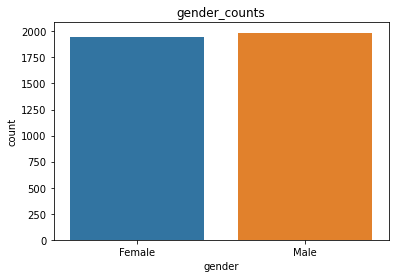

     senior_citizen_counts
No                    3312
Yes                    625


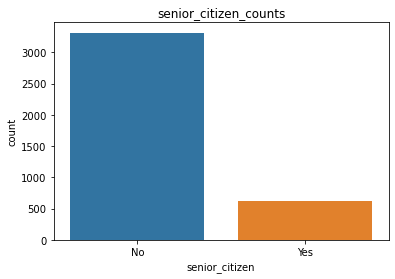

     partner_counts
No             2067
Yes            1870


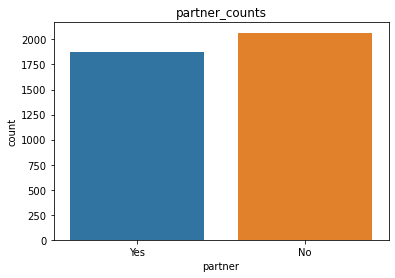

     dependents_counts
No                2764
Yes               1173


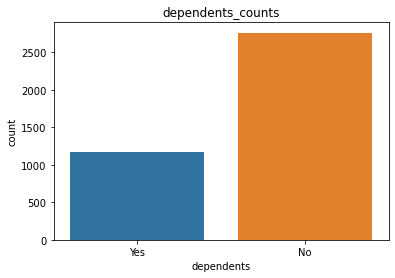

     phone_service_counts
Yes                  3542
No                    395


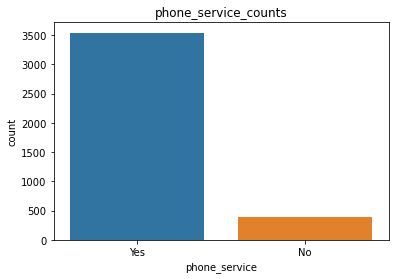

                  multiple_lines_counts
No                                 1858
Yes                                1684
No phone service                    395


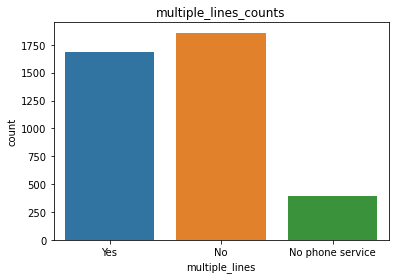

                     online_security_counts
No                                     1971
Yes                                    1147
No internet service                     819


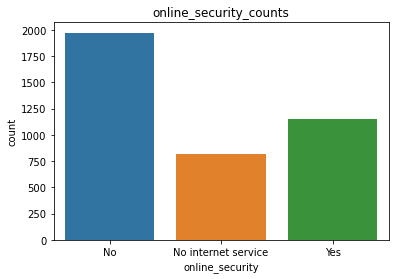

                     online_backup_counts
No                                   1761
Yes                                  1357
No internet service                   819


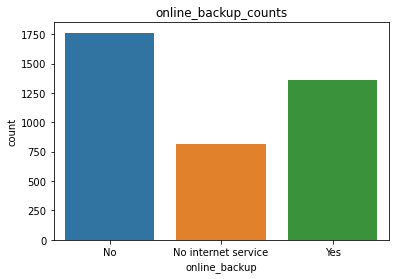

                     device_protection_counts
No                                       1776
Yes                                      1342
No internet service                       819


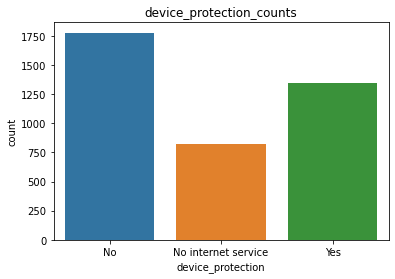

                     tech_support_counts
No                                  1978
Yes                                 1140
No internet service                  819


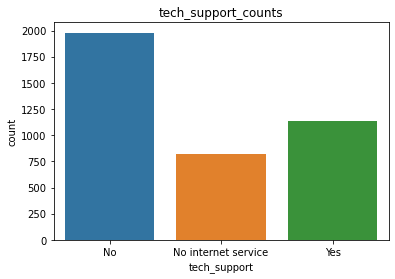

                     streaming_tv_counts
No                                  1602
Yes                                 1516
No internet service                  819


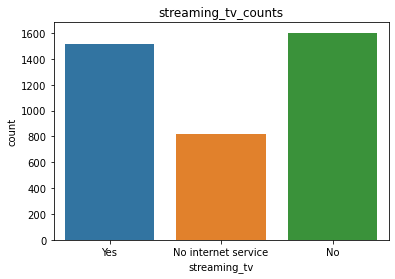

                     streaming_movies_counts
No                                      1585
Yes                                     1533
No internet service                      819


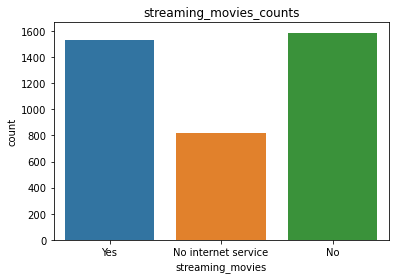

     paperless_billing_counts
Yes                      2368
No                       1569


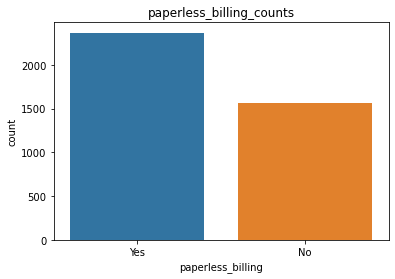

     churn_counts
No           2891
Yes          1046


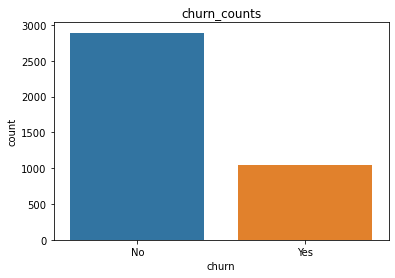

                contract_type_counts
Month-to-month                  2181
Two year                         924
One year                         832


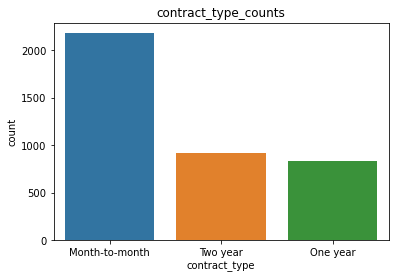

             internet_service_type_counts
Fiber optic                          1744
DSL                                  1374
None                                  819


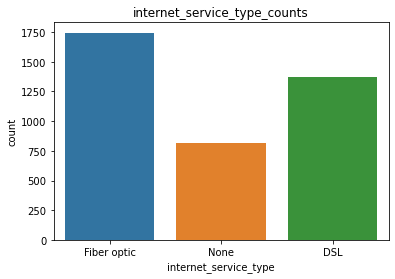

                           payment_type_counts
Electronic check                          1330
Mailed check                               906
Credit card (automatic)                    854
Bank transfer (automatic)                  847


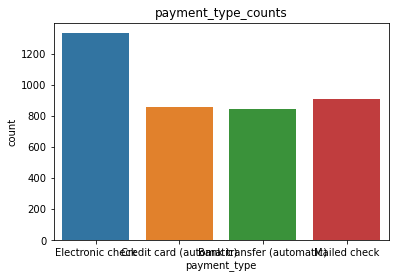

In [6]:
explore.univar_categorical(train)

Then we explore the distribution of customers across the possible values for continuous variables, including the amount of monthly charges and the customer's tenure.

The `univar_quantitative` function from the `explore` module uses the `train` sample to produce the visualizations shown below. 

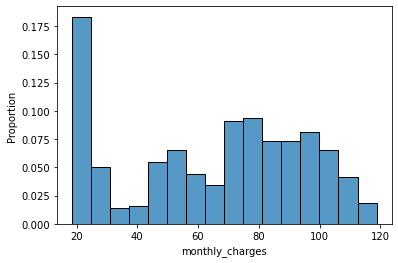

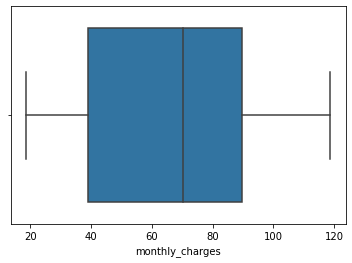

       monthly_charges
count      3937.000000
mean         65.054305
std          29.855770
min          18.550000
25%          38.900000
50%          70.350000
75%          89.800000
max         118.750000


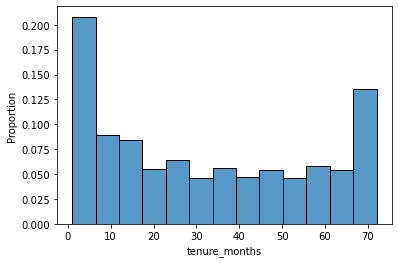

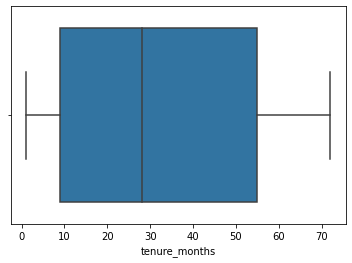

       tenure_months
count    3937.000000
mean       32.183896
std        24.599572
min         1.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000


In [7]:
explore.univar_quantitative(train)

### Initial Exploration - Bivariate

Next, we explore the average values for monthly charges and tenure for customers who have churned versus those whoh have not. 

The `bivar_quantitative` function from the `explore` module uses the `train` sample to produce the visualizations shown below. 

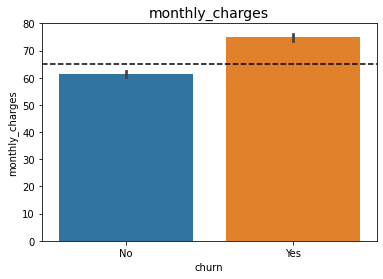

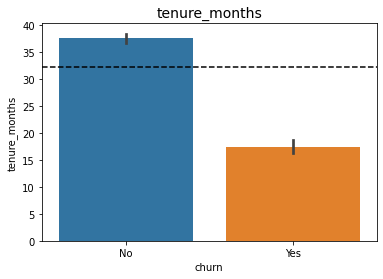

In [8]:
explore.bivar_quantitative(train, target)

### Initial Exploration - Multivariate

We then explore those categories further by looking at the distributions of monthly charges and tenure for customers have churned vs those who have not. 

The `explore_multivar_1` function from the `explore` module uses the `train` sample to produce the visualizations shown below. 

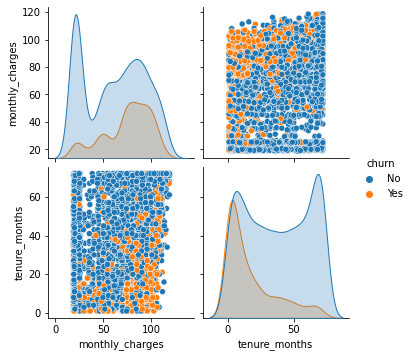

In [9]:
explore.multivar_1(train, target)

Next we explore how each of the variables correlates with whether a customer has churned. For this exploration, we have used the encoded (1's and 0's) version of our categorical variables. 

While correlation values between categorical values are not the most statistically sound metrics, this helps us get a basic understanding of how much each variable relates to our target, and provides a jumping off point for further exploration. 

The `explore_multivar_1` function from the `explore` module uses the `train` sample to produce the correlation chart shown below. 

In [10]:
explore.multivar_absolute_correlations(train)

,enc_churn
enc_churn,1.000000
tenure_months,0.360733
tenure_quarters,0.359064
tenure_years,0.347744
enc_payment_type_electronic check,0.327841
enc_internet_service_type_fiber optic,0.309845
enc_contract_type_two year,0.300538
enc_internet_service_type_none,0.230359
enc_streaming_movies_no internet service,0.230359
enc_streaming_tv_no internet service,0.230359


### Further Exploration - Does demographic information affect churn?

#### Is churn independent of gender?

Establish Hypotheses:

H0: Whether a customer has churned is independent of their gender

H1: Whether a customer has churned is not independent of their gender

The `chi2_test` function from the `explore` module runs a statistical test to determine the likelihood that the differences we see between the observed and expected values of gender versus churn might occur by chance. 

In [12]:
explore.chi2_test(train.churn, train.gender)

Observed

[[1429 1462]
 [ 521  525]]
---
Expected

[[1431.9 1459.1]
 [ 518.1  527.9]]
---

chi^2 = 0.0304
p     = 0.8616

Fail to Reject H0


The p-value of .8616 indicates that there is roughly an 86% percent probability that these differences would occur by chance. With this in mind, we fail to reject the null hypothesis, and we proceed under the assumption that whether a customer has churned is independent of their gender. 

#### Is churn independent of senior citizen status?

Establish hypotheses: 
    
H0: Whether a customer has churned is independent of whether they are a senior citizen
    
H1: Whether a customer has churned is not independent of whether they are a senior citizen

The `chi2_test` function from the `explore` module runs a statistical test to determine the likelihood that the differences we see between the observed and expected values of senior_citizen versus churn might occur by chance. 

In [14]:
# run the test and display results
explore.chi2_test(train.churn, train.senior_citizen)

Observed

[[2541  350]
 [ 771  275]]
---
Expected

[[2432.1  458.9]
 [ 879.9  166.1]]
---

chi^2 = 114.6522
p     = 0.0000

Reject H0


The p-value of 0.0000 indicates that there is virtually a 0 percent probability that these differences would occur by chance. With this in mind, wereject the null hypothesis, and we proceed under the assumption that a customer's senior citizen status is not independent of whether they have churned. 

#### Is churn independent of whether a customer has a partner?

Establish hypotheses:

H0: Whether a customer has churned is independent of whether they have a partner
    
H1: Whether a customer has churned is not independent of whether they have a partner
    
The `chi2_test` function from the `explore` module runs a statistical test to determine the likelihood that the differences we see between the observed and expected values of partner versus churn might occur by chance. 

In [16]:
# run the test and display results
explore.chi2_test(train.churn, train.partner)

Observed

[[1373 1518]
 [ 694  352]]
---
Expected

[[1517.8 1373.2]
 [ 549.2  496.8]]
---

chi^2 = 108.7547
p     = 0.0000

Reject H0


The p-value of 0.0000 indicates that there is virtually a 0 percent probability that these differences would occur by chance. With this in mind, wereject the null hypothesis, and we proceed under the assumption that whether a customer has a partner is not independent of whether they have churned. 

#### Is churn independent of whether a customer has dependents?

Establish hypotheses

H0: Whether a customer has churned is independent of whether they have dependents
H1: Whether a customer has churned is not independent of whether they have dependents
    
The `chi2_test` function from the `explore` module runs a statistical test to determine the likelihood that the differences we see between the observed and expected values of depedants versus churn might occur by chance. 

In [31]:
# run the test and display results
explore.chi2_test(train.churn, train.dependents)

Observed

[[1899  992]
 [ 865  181]]
---
Expected

[[2029.6  861.4]
 [ 734.4  311.6]]
---

chi^2 = 105.4278
p     = 0.0000

Reject H0


The p-value of 0.0000 indicates that there is virtually a 0 percent probability that these differences would occur by chance. With this in mind, wereject the null hypothesis, and we proceed under the assumption that whether a customer has dependants is not independent of whether they have churned. 

### Further Exploration - Do customers who churn have higher average monthly charges than those who don't?

Establish hypotheses

H0: Average monthly charges is the same for customers who have churned and those who have not

H1: Average monthly charges are higher for customers who have churned than for those who have not

The `hypothesis_test_monthly_charges` function from the `explore` module runs a statistical test to determine the likelihood that the difference that we see between mean monthly charges for customers who have churned and those who have not might occur by chance. 

In [21]:
explore.hypothesis_test_monthly_charges(train)

MANN-WHITNEY U TEST FOR: MONTHLY_CHARGES

H0: mean monthly_charges for customers who have churned <= mean monthly charges for those who have not churned
H1: mean monthly_charges for customers who have churned > mean monthly charges for those who have not churned

u = 1885392.5
p = 0.0



The p-value of 0.0000 indicates that there is virtually a 0 percent probability that this difference would occur by chance. With this in mind, we reject the null hypothesis, and we proceed under the assumption that customers who have churned have higher average monthly charges than those who did not churn.

### Further Exploration - What month (or range of months) are customers most likely to churn?

The `when_customers_churn` function from the `explore` module uses the `train` sample to create the charts and visualizations shown below. 

TENURE_MONTHS


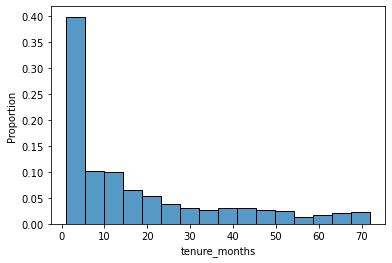

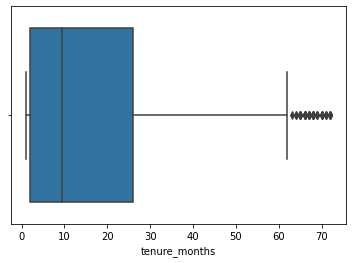

       tenure_months
count    1046.000000
mean       17.433078
std        19.212955
min         1.000000
25%         2.000000
50%         9.500000
75%        26.000000
max        72.000000
mode:		 1
TENURE_QUARTERS


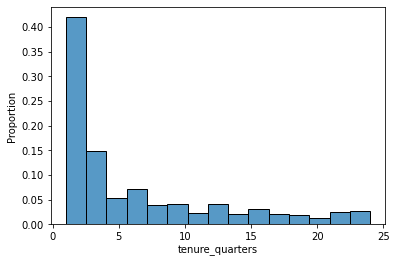

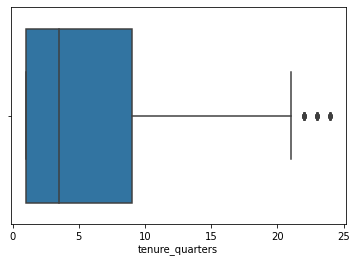

       tenure_quarters
count      1046.000000
mean          6.206501
std           6.362675
min           1.000000
25%           1.000000
50%           3.500000
75%           9.000000
max          24.000000
mode:		 1
TENURE_YEARS


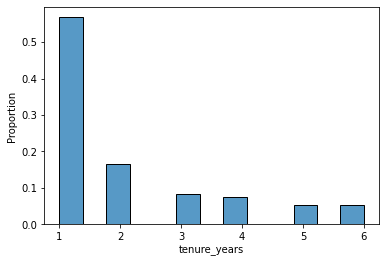

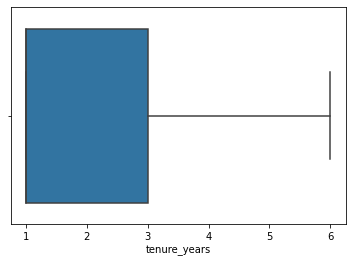

       tenure_years
count   1046.000000
mean       2.038241
std        1.509292
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        6.000000
mode:		 1


In [22]:
explore.when_customers_churn(train)

Customers churn most often in their first month, and on average in their 17th month.

Customers churn most often in their first quarter, and on average in their 6th quarter

Customers churn most often in their first year, and on average in their 2nd year. 

The bulk of customers (75%) churn within their first three years. 

### Further Exploration - What month are customers most likely to churn - by contract type

When we control for contract type, we see a marked difference in the typical time period a customer churns for month-to-month customers versus the other contract types. 

The `when_customers_churn_by_contract_type` function from the `explore` module creates the charts and visualizations shown below. 

One year


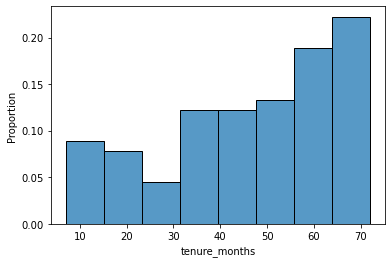

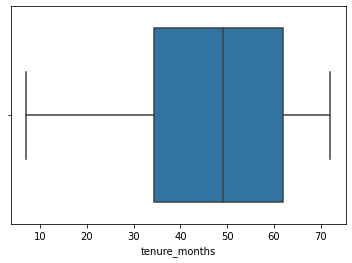

       tenure_months
count      90.000000
mean       46.388889
std        18.304352
min         7.000000
25%        34.250000
50%        49.000000
75%        62.000000
max        72.000000
mode:		 56
Two year


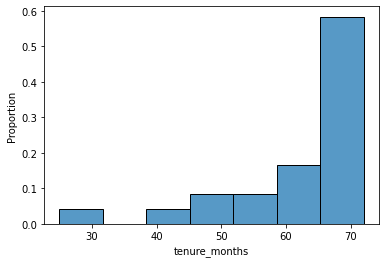

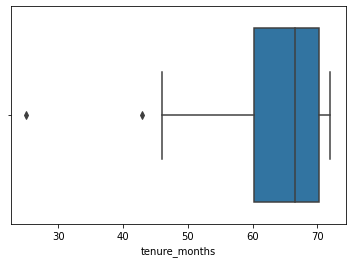

       tenure_months
count      24.000000
mean       62.583333
std        11.515270
min        25.000000
25%        60.250000
50%        66.500000
75%        70.250000
max        72.000000
mode:		 71
Month-to-month


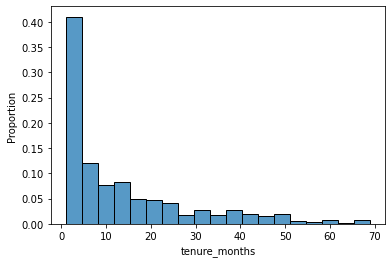

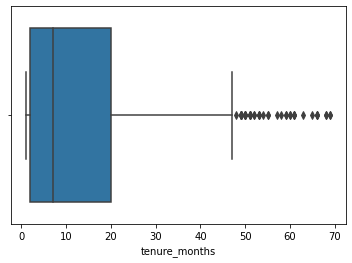

       tenure_months
count     932.000000
mean       13.474249
std        15.157192
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max        69.000000
mode:		 1


In [24]:
explore.when_customers_churn_by_contract_type(train)

Here we can see that the distribution of tenure varies significantly between those with monthly contract and those with other contract types. Monthly customers, who we know are most likely to churn, also churn much earlier than their longer-contract counterparts. This should not be surprising, but it is worth noting. 

The average month in which monthly customers churn is their 13th month (while the most common is the 1st month). 

For yearly and two-year contract customers, the average is the 46th and 62nd month, respectively (most common is 56 and 71). 

### Further Exploration: is there an internet service type associated with more or less churn than expected?
i.e. is the churn rate different for any particular service type vs the overall average?

The `churn_by_int_service_type` function from the `explore` module produces the visualization shown below. 

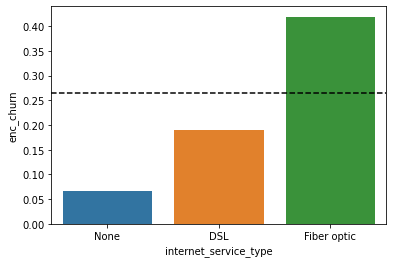

In [25]:
explore.churn_by_int_service_type(train)

We can see that customers with Fiber Optic internet service churn at a rate that is much higher than the overall average (represented by the dashed line). 

But does this difference occur by chance?

#### Is whether a customer has churned independent of their internet service type?

Establish hypotheses

H0: Whether a customer has churned is independent of their internet service type

H1: Whether a customer has churned is not independent of their internet service type

The `chi2_test` function from the `explore` module runs a statistical test to determine the likelihood that the differences we see between the observed and expected values of internet service type versus churn might occur by chance. 

In [27]:
# run the test and display results
explore.chi2_test(train.churn, train.internet_service_type)

Observed

[[1114 1013  764]
 [ 260  731   55]]
---
Expected

[[1008.9 1280.6  601.4]
 [ 365.1  463.4  217.6]]
---

chi^2 = 417.1612
p     = 0.0000

Reject H0


Since p is < alpha, we reject the null hypothesis and proceed under the assumption that whether a customer has churned is not independent of their internet service type

# MODELING

### Decision Tree

In [ ]:
positive = 1
target = 'enc_churn'

In [ ]:
# create empty dataframe to store model results
model_results = pd.DataFrame(columns=['model_number', 'metric_type', 'sample_type', 'score'])

# empty dataframe to store information about the model itself
model_info = pd.DataFrame(columns=['model_number', 'features'])

In [ ]:
# identify encoded feature columns
encoded_columns = [col for col in df.columns if (col[:4] == 'enc_') and col != target]

In [ ]:
# # make a list of all possible feature combinations
# feature_combos = []
# for i in range (1, len(encoded_columns)+1):
#     feature_combos.extend(list(itertools.combinations(encoded_columns,i)))
# feature_combos = [np.array(combo) for combo in feature_combos]


In [ ]:
for col in train.columns:
    print(col)

In [ ]:
features1 = encoded_columns
features2 = ['enc_gender_male', 
             'enc_senior_citizen_yes', 
             'enc_partner_yes', 
             'enc_dependents_yes', 
             'enc_contract_type_one year', 'enc_contract_type_two year', 
             'enc_internet_service_type_fiber optic', 'enc_internet_service_type_none']
feature_combos = [features1, features2]

In [ ]:
# separate each sample into x and y
x_train = train.drop(columns=target)
y_train = train[target]

x_validate = validate.drop(columns=target)
y_validate = validate[target]

x_test = test.drop(columns=target)
y_test = test[target]

# store baseline metrics

model_number = 'baseline'
model_type = 'baseline'

# store info about the model
dct = {'model_number': model_number,
       'model_type': model_type}
model_info = model_info.append(dct, ignore_index=True)

# establish baseline predictions for train sample
y_pred = baseline_pred = pd.Series([train[target].mode()[0]]).repeat(len(train))

# get metrics
dct = {'model_number': model_number, 
       'sample_type': 'train', 
       'metric_type': 'accuracy',
       'score': sk.metrics.accuracy_score(y_train, y_pred)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'train', 
       'metric_type': 'precision',
       'score': sk.metrics.precision_score(y_train, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'train', 
       'metric_type': 'recall',
       'score': sk.metrics.recall_score(y_train, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'train', 
       'metric_type': 'f1_score',
       'score': sk.metrics.f1_score(y_train, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

# establish baseline predictions for validate sample
y_pred = baseline_pred = pd.Series([train[target].mode()[0]]).repeat(len(validate))

# get metrics
dct = {'model_number': model_number, 
       'sample_type': 'validate', 
       'metric_type': 'f1_score',
       'score': sk.metrics.f1_score(y_validate, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'validate', 
       'metric_type': 'accuracy',
       'score': sk.metrics.accuracy_score(y_validate, y_pred)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'validate', 
       'metric_type': 'precision',
       'score': sk.metrics.precision_score(y_validate, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

dct = {'model_number': model_number, 
       'sample_type': 'validate', 
       'metric_type': 'recall',
       'score': sk.metrics.recall_score(y_validate, y_pred, pos_label=positive)}
model_results = model_results.append(dct, ignore_index=True)

model_number = 0

In [ ]:
# create models and store results

for features in feature_combos:
    for max_depth in range(1, 11):

        model_number += 1
        model_type = 'decision tree'

        # store info about the model
        dct = {'model_number': model_number,
               'model_type': model_type,
               'features': features,
               'max_depth': max_depth}
        model_info = model_info.append(dct, ignore_index=True)

        # separate each sample into x and y
        x_train = train[features]
        y_train = train[target]

        x_validate = validate[features]
        y_validate = validate[target]


        # create the classifer
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

        # fit the classifier to the training data
        clf = clf.fit(x_train, y_train)


        # results for train sample
        y_pred = clf.predict(x_train)
        sample_type = 'train'


        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_train, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)


        # results for validate sample
        x_train
        y_pred = clf.predict(x_validate)
        sample_type = 'validate'

        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_validate, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': sample_type, 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)     

In [ ]:
def display_model_results():
    return model_results.pivot_table(columns='model_number', 
                                     index=('metric_type', 'sample_type'), 
                                     values='score',
                                     aggfunc=lambda x: x)

In [ ]:
model_info

In [ ]:
display_model_results()

### Random Forest

In [ ]:
for features in feature_combos:
    for max_depth in range(1, 11):
        for min_samples_leaf in range(1, 11):

            model_number += 1

            model_type = 'random forest'

            # store info about the model
            dct = {'model_number': model_number,
                   'model_type': model_type,
                   'features': features,
                   'max_depth': max_depth, 
                   'min_samples_leaf': min_samples_leaf}
            model_info = model_info.append(dct, ignore_index=True)

            # separate each sample into x and y
            x_train = train[features]
            y_train = train[target]

            x_validate = validate[features]
            y_validate = validate[target]


            # create the classifer
            clf = RandomForestClassifier(max_depth=max_depth, 
                                         min_samples_leaf=min_samples_leaf, 
                                         random_state=42)

            # fit the classifier to the training data
            clf = clf.fit(x_train, y_train)


            # results for train sample
            y_pred = clf.predict(x_train)


            # get metrics
            dct = {'model_number': model_number, 
                   'sample_type': 'train', 
                   'metric_type': 'accuracy',
                   'score': sk.metrics.accuracy_score(y_train, y_pred)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'train', 
                   'metric_type': 'precision',
                   'score': sk.metrics.precision_score(y_train, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'train', 
                   'metric_type': 'recall',
                   'score': sk.metrics.recall_score(y_train, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'train', 
                   'metric_type': 'f1_score',
                   'score': sk.metrics.f1_score(y_train, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)


            # results for validate sample
            x_train
            y_pred = clf.predict(x_validate)

            # get metrics
            dct = {'model_number': model_number, 
                   'sample_type': 'validate', 
                   'metric_type': 'f1_score',
                   'score': sk.metrics.f1_score(y_validate, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'validate', 
                   'metric_type': 'accuracy',
                   'score': sk.metrics.accuracy_score(y_validate, y_pred)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'validate', 
                   'metric_type': 'precision',
                   'score': sk.metrics.precision_score(y_validate, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)

            dct = {'model_number': model_number, 
                   'sample_type': 'validate', 
                   'metric_type': 'recall',
                   'score': sk.metrics.recall_score(y_validate, y_pred, pos_label=positive)}
            model_results = model_results.append(dct, ignore_index=True)    

In [ ]:
model_info

In [ ]:
display_model_results()

### KNN

In [ ]:
for features in feature_combos:    
    for k_neighbors in range(1, 11):

        model_number += 1

        model_type = 'KNN'

        # store info about the model
        dct = {'model_number': model_number,
               'model_type': model_type,
               'features': features,
               'k-neighbors': k_neighbors}
        model_info = model_info.append(dct, ignore_index=True)

        # separate each sample into x and y
        x_train = train[features]
        y_train = train[target]

        x_validate = validate[features]
        y_validate = validate[target]


        # create the classifer
        clf = KNeighborsClassifier(n_neighbors=k_neighbors)

        # fit the classifier to the training data
        clf = clf.fit(x_train, y_train)


        # results for train sample
        y_pred = clf.predict(x_train)


        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_train, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)


        # results for validate sample
        x_train
        y_pred = clf.predict(x_validate)

        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_validate, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)    

In [ ]:
model_info

In [ ]:
display_model_results()

### Logistic Regression

In [ ]:
for features in feature_combos:    
    for c_value in [.001, .01, .1, 1, 10, 100, 1000]:

        model_number += 1

        model_type = 'logistic regression'

        # store info about the model
        dct = {'model_number': model_number,
               'model_type': model_type,
               'features': features,
               'c_value': c_value}
        model_info = model_info.append(dct, ignore_index=True)

        # separate each sample into x and y
        x_train = train[features]
        y_train = train[target]

        x_validate = validate[features]
        y_validate = validate[target]


        # create the classifier
        clf = LogisticRegression(C=c_value)

        # fit the classifier to the training data
        clf = clf.fit(x_train, y_train)


        # results for train sample
        y_pred = clf.predict(x_train)


        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_train, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'train', 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_train, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)


        # results for validate sample
        x_train
        y_pred = clf.predict(x_validate)

        # get metrics
        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'f1_score',
               'score': sk.metrics.f1_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'accuracy',
               'score': sk.metrics.accuracy_score(y_validate, y_pred)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'precision',
               'score': sk.metrics.precision_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)

        dct = {'model_number': model_number, 
               'sample_type': 'validate', 
               'metric_type': 'recall',
               'score': sk.metrics.recall_score(y_validate, y_pred, pos_label=positive)}
        model_results = model_results.append(dct, ignore_index=True)    

In [ ]:
model_info

In [ ]:
display_model_results()

In [ ]:
train_accuracy = model_results[(model_results.sample_type == 'train') & (model_results.metric_type == 'accuracy')]
train_accuracy[train_accuracy.score == train_accuracy.score.max()]

In [ ]:
validate_accuracy = model_results[(model_results.sample_type == 'validate') & (model_results.metric_type == 'accuracy')]
validate_accuracy[validate_accuracy.score == validate_accuracy.score.max()]

In [ ]:
df.head()

In [ ]:
df.payment_type.unique()